In [35]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

In [36]:
def detect_staff(music_sheet):
    _,music_sheet_bi = cv.threshold(music_sheet,0, 1, cv.THRESH_BINARY+cv.THRESH_OTSU)

    col_hist = np.sum(music_sheet_bi, axis=0)
    col_hist = np.float32(col_hist)
    col_hist_norm = col_hist.copy()

    cv.normalize(col_hist,col_hist_norm,0,1, norm_type=cv.NORM_MINMAX)

    indices = np.where(col_hist_norm >= 1)
    indices = indices[0]

    for i in range(len(indices)):
        if indices[i+1]-indices[i] > 2:
            #s_index = indices[i]
            e_index = indices[i+1]
            break
            
    music_sheet_bi = music_sheet_bi[0:-1,0:e_index]    

    row_hist = np.sum(music_sheet_bi, axis=1)
    row_hist = np.float32(row_hist)
    row_hist_norm = row_hist.copy()

    cv.normalize(row_hist,row_hist_norm,0,1, norm_type=cv.NORM_MINMAX)

    row_hist_norm = 1-row_hist_norm
    staff,_ = signal.find_peaks(row_hist_norm, height=0.9)

    s_staff = []
    e_staff = []

    for i in range(len(staff)):
        if i%5 == 0:
            s_staff.append(staff[i]-1)
        elif i%5 == 4:
            e_staff.append(staff[i]+1)

    staff_crop = []

    for j in range(len(staff)//5):
        staff_crop.append(music_sheet_bi[s_staff[j]:e_staff[j],0:-1])

    return staff_crop

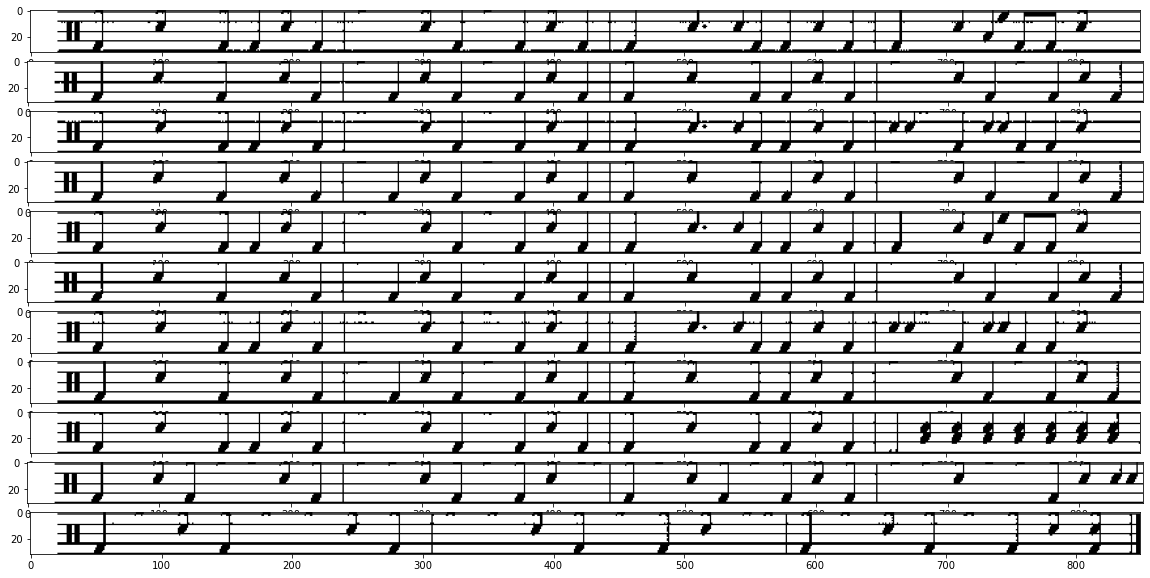

In [37]:
music_sheet = cv.imread('C:/Users/ADmin/Desktop/drum/music_sheet/'+'/6.jpg',0)

staff_crop = detect_staff(music_sheet)

plt.figure(figsize=[20,10])
for i in range(len(staff_crop)):
    plt.subplot(11,1,i+1),plt.imshow(staff_crop[i],cmap='gray')

In [28]:
e_index

0